In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class sampler:
    def __init__(self, unnormalized_pdf, resolution, seed=None):
        # set the seen for random sampling
        try:
            np.random.seed(seed)
        except:
            pass

        # set the resolution of the discritized pdf/cdf using the resolution of the sample space
        self.resolution = resolution

        # normalize the pdf
        self.pdf = unnormalized_pdf(resolution)
        self.pdf = self.pdf / np.sum(self.pdf)

        # find the cdf from the user provided pdf
        self.cdf = []
        self._cdf_from_pdf()
    
    def _cdf_from_pdf(self):
        """Create CDF from PDF."""
        self.cdf = np.array([np.sum(self.pdf[:i + 1]) for i in range(self.resolution)])
        
    def draw_samples(self, number_samples):
        """Draw samples from the PDF by inverting the CDF."""
        sample_list = []
        samples_cdf = np.random.rand(number_samples)
        for cdf_item in samples_cdf:
            temp = self.cdf - cdf_item
            sample_list.append(np.where(temp >= 0)[0][0])
        return np.reshape(np.array(sample_list), [-1])

    def plot_cdf_and_samples(self, sample_list):
        """Plot the samples, PDF, and CDF."""
        fig, laxis = plt.subplots()
        fig.set_size_inches(4, 4)
        laxis.plot(np.linspace(0, 1, self.resolution), self.pdf, color = 'black', label = r"Given PDF")
        laxis.hist(np.linspace(0, 1, self.resolution)[sample_list], 
                 np.linspace(0 - 1 / (2 * (self.resolution - 1)), 1 + 1 / (2 * (self.resolution - 1)), self.resolution + 1), 
                 histtype = 'step',
                 weights = np.ones(len(sample_list)) / len(sample_list),
                 color = 'blue',
                 label = r"Samples")
        plt.ylim([0, np.max(self.pdf) * 2])
        laxis.set_yticks([0, np.max(self.pdf), np.max(self.pdf) * 2])
        laxis.set_yticklabels([0, np.round(np.max(self.pdf), 2), np.round(2 * np.max(self.pdf), 2)])
        lhandles, llabels = laxis.get_legend_handles_labels()

        raxis = laxis.twinx()
        raxis.plot(np.linspace(0, 1, self.resolution), self.cdf, color = 'red', label = r"Computed CDF")
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        raxis.set_yticks([0, 0.5, 1])
        raxis.set_yticklabels([0, np.round(0.5, 1), np.round(1, 1)])
        rhandles, rlabels = raxis.get_legend_handles_labels()
        laxis.legend(handles = lhandles + rhandles, labels = llabels + rlabels, loc = "upper left")
        laxis.set_position([0.1, 0.1, 0.8, 0.8])
        plt.show()

In [3]:
def unnormalized_pdf(resolution):
    """Define your distribution. Take the resolution as an argument."""
    return np.array([1 for x in np.linspace(0, 1, resolution)])

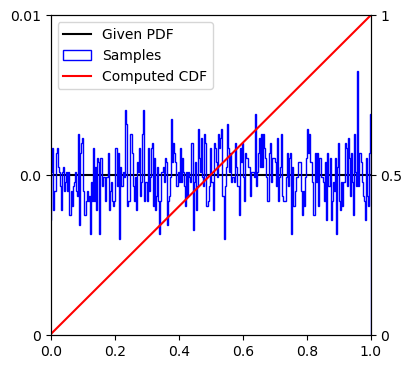

In [10]:
resolution = 300
number_samples = 10000
data = []
r = sampler(unnormalized_pdf, resolution, i)
data.append(r.draw_samples(number_samples))
r.plot_cdf_and_samples(data[-1])